# [다변량 선형 확률과정](https://today-1.tistory.com/38)

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'D2Coding'
import seaborn as sns 

from tqdm import tqdm
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
import sys 

sys.path.append("../../../")

from asset.common.utils import load_stock

In [3]:
import easydict
args = easydict.EasyDict()

args.SEED = 42

args.save_stock_preprocessing_path = '../../../data/stock/preprocessing/{stock_code}.csv'

# Data

In [4]:
save_path = '../../../data/meta/stock_corps.csv'
df_dtype = {
    'stock_code': 'object'
}

df_corps = pd.read_csv(save_path, dtype=df_dtype)

print(f'{df_corps.shape} / {df_corps.isnull().sum().sum()}')
df_corps.head()

(2494, 13) / 20


,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product,industry_wics_ss_nm,industry_wics_ss_cd,industry_wics_ms_cd,industry_wics_ms_nm,industry_wics_ls_cd,industry_wics_ls_nm
0,956028,엑세스바이오,950130,K,kosdaq,의료용품 및 기타 의약 관련제품 제조업,"말라리아 진단키트(RDT), HIV 진단키트(RDT)",생명과학도구및서비스,352030,3520,제약과생물공학,35,건강관리
1,783246,글로벌에스엠,900070,K,kosdaq,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)",자동차부품,251010,2510,자동차와부품,25,경기관련소비재
2,1170962,GRT,900290,K,kosdaq,기타 금융업,"광학필름, 포장필름",화학,151010,1510,소재,15,소재
3,600013,맵스리얼티1,094800,Y,kospi,신탁업 및 집합투자업,NaN,미분류,0,0,NaN,0,NaN
4,1139266,로스웰,900260,K,kosdaq,기타 금융업,"CAN Control Gateway, CAN기능모듈, BCM 차체제어모듈",자동차부품,251010,2510,자동차와부품,25,경기관련소비재


In [5]:
c1 = df_corps['corp_name'] == 'NAVER'
c2 = df_corps['corp_name'] == '카카오'
c = c1 | c2

df_corps.loc[c]

,corp_code,corp_name,stock_code,corp_cls,corp_cls_nm,sector,product,industry_wics_ss_nm,industry_wics_ss_cd,industry_wics_ms_cd,industry_wics_ms_nm,industry_wics_ls_cd,industry_wics_ls_nm
902,258801,카카오,035720,Y,kospi,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),양방향미디어와서비스,502050,5020,미디어와엔터테인먼트,50,커뮤니케이션서비스
1571,266961,NAVER,035420,Y,kospi,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",포털 서비스 및 온라인 광고,양방향미디어와서비스,502050,5020,미디어와엔터테인먼트,50,커뮤니케이션서비스


In [6]:
stock_df_dict = load_stock(df_corps.loc[c]['stock_code'].values, args.save_stock_preprocessing_path)

stock_df_dict.keys()

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 29.79it/s]


dict_keys(['035720', '035420'])

In [9]:
df_corps.loc[c][['stock_code', 'corp_name']].values

array([['035720', '카카오'],
       ['035420', 'NAVER']], dtype=object)

In [15]:
df = pd.DataFrame()

for corp in df_corps.loc[c][['stock_code', 'corp_name']].values:

    _df = stock_df_dict[corp[0]][['Close']]
    _df.rename(columns={'Close':corp[1]}, inplace=True)
    df = pd.concat([df, _df], axis=1)

/var/folders/tv/05qbcb8954z9x1yvqv_kr2t80000gn/T/ipykernel_38540/3858286972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.rename(columns={'Close':corp[1]}, inplace=True)
/var/folders/tv/05qbcb8954z9x1yvqv_kr2t80000gn/T/ipykernel_38540/3858286972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.rename(columns={'Close':corp[1]}, inplace=True)


In [16]:
df = df.loc['2020-01-02':]
df.isnull().sum()

카카오      3
NAVER    0
dtype: int64

In [17]:
c = df['카카오'].isnull()

df.loc[c]

,카카오,NAVER
Date,,
2021-04-12,NaN,385500.0
2021-04-13,NaN,388500.0
2021-04-14,NaN,391500.0


In [22]:
df = df.dropna()
df.isnull().sum()

카카오      0
NAVER    0
dtype: int64

In [30]:
df = df[['NAVER', '카카오']]
df.head()

,NAVER,카카오
Date,,
2020-01-02,182500.0,30609.0
2020-01-03,181500.0,30609.0
2020-01-06,180500.0,31010.0
2020-01-07,187000.0,32114.0
2020-01-08,183000.0,32014.0


<Axes: xlabel='Date'>

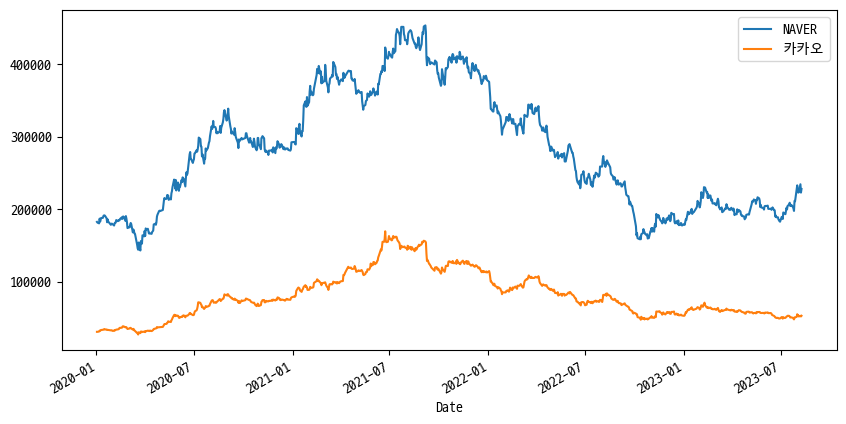

In [31]:
df.plot(figsize=(10,5))

# 벡터자기회귀 모형(VAR)
- 종속 변수와 독립 변수는 상호 영향을 받는 존재.
- 두 변수들 중 어떤 변수가 종속변수로 적합한지에 대한 문제를 해결하기 위해 VAR을 활용.

In [32]:
import statsmodels.api as sm

- 데이터는 차분하여 정상화 

In [33]:
fit = sm.tsa.VAR(df.diff(1).dropna()).fit(maxlags=2)
fit.summary()

/Users/gyoungwon-cho/.pyenv/versions/3.11.3/envs/stock-venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 09, Aug, 2023
Time:                     23:59:54
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    32.1826
Nobs:                     887.000    HQIC:                   32.1492
Log likelihood:          -16756.2    FPE:                8.97989e+13
AIC:                      32.1286    Det(Omega_mle):     8.87950e+13
--------------------------------------------------------------------
Results for equation NAVER
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           54.857530       211.919224            0.259           0.796
L1.NAVER        -0.057263         0.046962           -1.219           0.223
L1.카카오           0.267944         0.142229            1.884           0.060
L2.N

### 예측 및 시각화

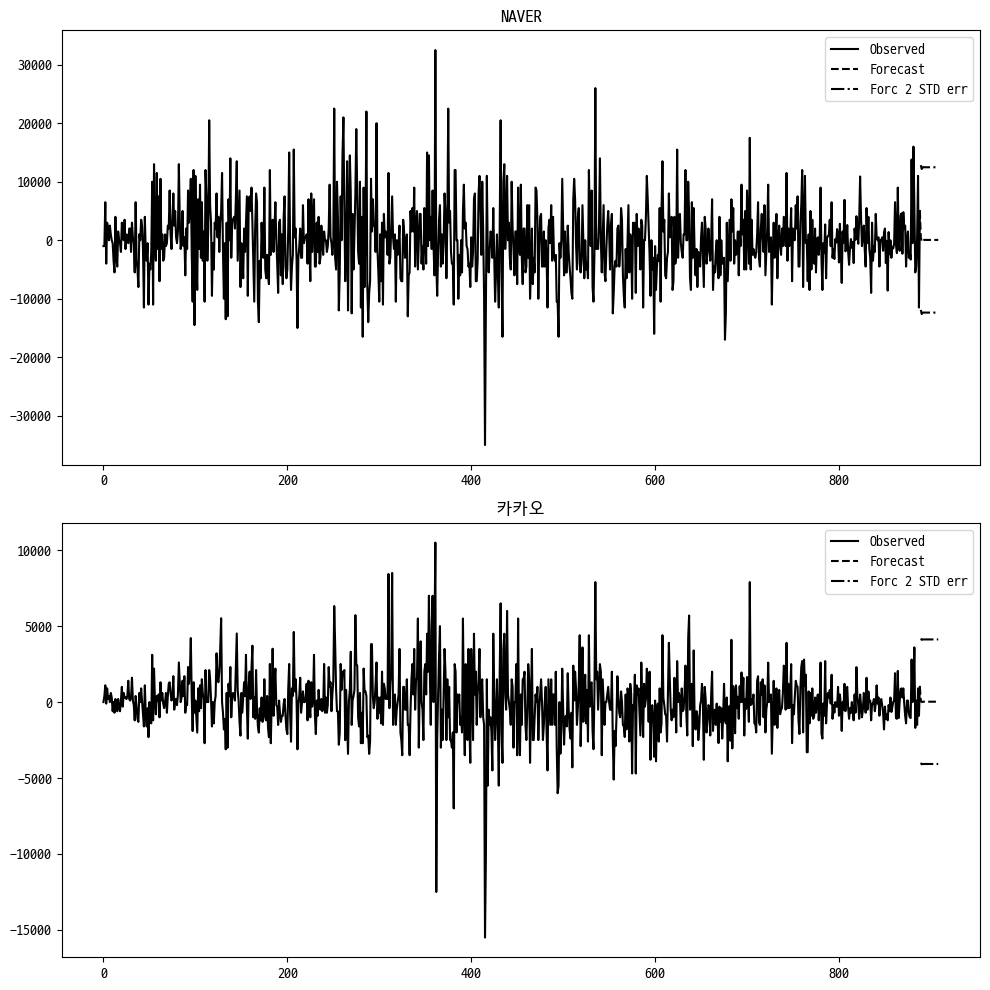

In [34]:
forecast_num = 20
fit.plot_forecast(forecast_num)

plt.tight_layout()
plt.show()

### 임펄스반응함수 추정

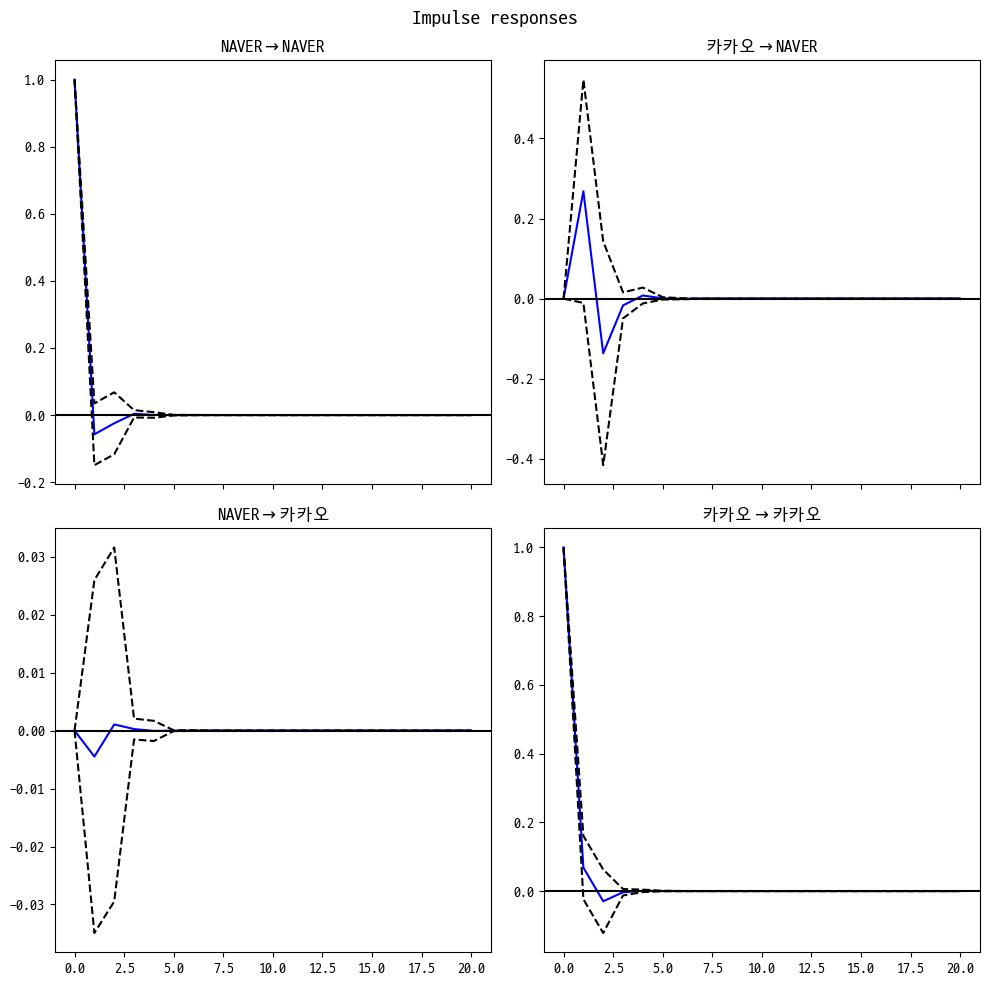

In [35]:
fit.irf(forecast_num).plot()
plt.tight_layout()
plt.show()

# 그래인저 인과관계 모형(Granger Causality Model)
- '닭이 먼저냐 달걀이 먼저냐' 문제를 해결할 때 사용
    - 추론불가한 문제: "닭이 먼저인가 달걀이 먼저인가?" (인과관계)
    - 추론가능한 문제: "닭과 달걀의 생성순서 별 서로의 영향력은 어떤가?" (Granger 인과관계)
- 원인과 인과 관계를 규명하는 어렵기 때문에 상대적으로 두 요인 중 먼저 영향을 미치는 변수를 알아보고자 할 때 사용
    - 귀무가설(Null Hypothesis, 𝐻0H0): 한 변수가 다른 변수를 예측하는데 도움이 되지 않는다
    - 대립가설(Alternative Hypothesis, 𝐻1H1): 한 변수가 다른 변수를 예측하는데 도움이 된다

In [36]:
print('\n[naver -> kakao]')
granger_result1 = sm.tsa.stattools.grangercausalitytests(df.diff(1).dropna().iloc[:,:].values, maxlag=3, verbose=True)


[naver -> kakao]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2416  , p=0.0721  , df_denom=885, df_num=1
ssr based chi2 test:   chi2=3.2526  , p=0.0713  , df=1
likelihood ratio test: chi2=3.2466  , p=0.0716  , df=1
parameter F test:         F=3.2416  , p=0.0721  , df_denom=885, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2391  , p=0.1072  , df_denom=882, df_num=2
ssr based chi2 test:   chi2=4.5035  , p=0.1052  , df=2
likelihood ratio test: chi2=4.4921  , p=0.1058  , df=2
parameter F test:         F=2.2391  , p=0.1072  , df_denom=882, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2967  , p=0.0200  , df_denom=879, df_num=3
ssr based chi2 test:   chi2=9.9690  , p=0.0188  , df=3
likelihood ratio test: chi2=9.9133  , p=0.0193  , df=3
parameter F test:         F=3.2967  , p=0.0200  , df_denom=879, df_num=3


/Users/gyoungwon-cho/.pyenv/versions/3.11.3/envs/stock-venv/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [37]:
print('\n[kakao -> naver]') 
granger_result2 = sm.tsa.stattools.grangercausalitytests(df.diff(1).dropna().iloc[:,[1,0]].values, maxlag=3, verbose=True)


[kakao -> naver]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0902  , p=0.7640  , df_denom=885, df_num=1
ssr based chi2 test:   chi2=0.0905  , p=0.7635  , df=1
likelihood ratio test: chi2=0.0905  , p=0.7636  , df=1
parameter F test:         F=0.0902  , p=0.7640  , df_denom=885, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0452  , p=0.9559  , df_denom=882, df_num=2
ssr based chi2 test:   chi2=0.0908  , p=0.9556  , df=2
likelihood ratio test: chi2=0.0908  , p=0.9556  , df=2
parameter F test:         F=0.0452  , p=0.9559  , df_denom=882, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7973  , p=0.1461  , df_denom=879, df_num=3
ssr based chi2 test:   chi2=5.4348  , p=0.1426  , df=3
likelihood ratio test: chi2=5.4182  , p=0.1436  , df=3
parameter F test:         F=1.7973  , p=0.1461  , df_denom=879, df_num=3


# 공적분 모형(Coointegration Model)
- 공적분 상태 = 두 비정상성 시계열을 선형조합하여 생성한 시계열의 적분 차수가 낮아지거나 정상상태가 되는 경우
- 공적분 시계열은 서로 상관관계를 가지고 있지 않더라도 장기적으로 같은 방향으로 움직이는 특성을 지님
- 페어 트레이딩 전략에 활용 됨

In [40]:
sm.tsa.coint(df['NAVER'],df['카카오'])

(-2.386912770623689,
 0.3310782087657893,
 array([-3.90880177, -3.34301164, -3.0492242 ]))